In [4]:
import sys
import tensorflow as tf
sys.path.append("/aiffel/aiffel/Blindless/CODE/Models")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/aiffel/aiffel/Blindless/CODE/Models/Pyramid")
import Pyramid

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'Pyramid_30ep_512_fG'
INPUT_SHAPE = (512, 512, 1)
MODEL_PATH = "/aiffel/aiffel/Blindless/CODE/Models/Pyramid/model_parameters/" + FILE_NAME + ".h5"
HISTORY_PATH = "/aiffel/aiffel/Blindless/CODE/Models/Pyramid/history/" + FILE_NAME + '_history' ".json"
SOURCE = '/aiffel/aiffel/Blindless/DATA'

In [5]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}

# Create augmentation
# FullSizedDataGenerator & SlicedDataGenerator -> build_augmentation_for_general
# AdaptiveDataGenerator -> build_augmentation_for_adaptive
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0],is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=4, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=4, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = Pyramid.unet_model(INPUT_SHAPE)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d_76 (Conv2D)          (None, 512, 512, 16)         32        ['input_3[0][0]']             
                                                                                                  
 conv2d_74 (Conv2D)          (None, 512, 512, 8)          16        ['input_3[0][0]']             
                                                                                                  
 conv2d_75 (Conv2D)          (None, 512, 512, 16)         160       ['input_3[0][0]']             
                                                                                            

 agePooling2D)                                                                                    
                                                                                                  
 conv2d_94 (Conv2D)          (None, 32, 32, 32)           4128      ['average_pooling2d_32[0][0]']
                                                                                                  
 conv2d_95 (Conv2D)          (None, 16, 16, 32)           4128      ['average_pooling2d_33[0][0]']
                                                                                                  
 conv2d_96 (Conv2D)          (None, 8, 8, 32)             4128      ['average_pooling2d_34[0][0]']
                                                                                                  
 conv2d_97 (Conv2D)          (None, 4, 4, 32)             4128      ['average_pooling2d_35[0][0]']
                                                                                                  
 conv2d_tr

                                                                                                  
 average_pooling2d_43 (Aver  (None, 16, 16, 128)          0         ['conv2d_transpose_49[0][0]'] 
 agePooling2D)                                                                                    
                                                                                                  
 conv2d_102 (Conv2D)         (None, 128, 128, 32)         4128      ['average_pooling2d_40[0][0]']
                                                                                                  
 conv2d_103 (Conv2D)         (None, 64, 64, 32)           4128      ['average_pooling2d_41[0][0]']
                                                                                                  
 conv2d_104 (Conv2D)         (None, 32, 32, 32)           4128      ['average_pooling2d_42[0][0]']
                                                                                                  
 conv2d_10

Total params: 1300305 (4.96 MB)
Trainable params: 1300305 (4.96 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________


In [10]:
SOURCE

'/aiffel/aiffel/Blindless/DATA'

In [3]:
len(train_generator)

295

In [4]:
len(test_generator)

125

In [3]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH)

Epoch 1/30
295/295 [==============================] - 370s 1s/step - loss: 0.6714 - sensitivity: 0.1382 - specificity: 0.9722 - accuracy: 0.9145 - val_loss: 0.5847 - val_sensitivity: 0.5238 - val_specificity: 0.8871 - val_accuracy: 0.8621

Epoch 00001: val_sensitivity improved from -inf to 0.52384, saving model to /aiffel/aiffel/Blindless/CODE/Models/Pyramid/model_parametersPyramid_30ep_512_fG.h5
Epoch 2/30
295/295 [==============================] - 249s 845ms/step - loss: 0.4868 - sensitivity: 0.4789 - specificity: 0.9493 - accuracy: 0.9168 - val_loss: 0.4189 - val_sensitivity: 0.5756 - val_specificity: 0.9511 - val_accuracy: 0.9251

Epoch 00002: val_sensitivity improved from 0.52384 to 0.57560, saving model to /aiffel/aiffel/Blindless/CODE/Models/Pyramid/model_parametersPyramid_30ep_512_fG.h5
Epoch 3/30
295/295 [==============================] - 256s 867ms/step - loss: 0.3814 - sensitivity: 0.5893 - specificity: 0.9624 - accuracy: 0.9366 - val_loss: 0.3544 - val_sensitivity: 0.5503 -

125/125 [==============================] - 594s 5s/step - loss: 0.2452 - sensitivity: 0.7835 - specificity: 0.9698 - accuracy: 0.9572
Loss: 0.24515515565872192
Sensitivity: 0.7834839820861816
Specificity: 0.9698473215103149
Accuracy: 0.9571623206138611


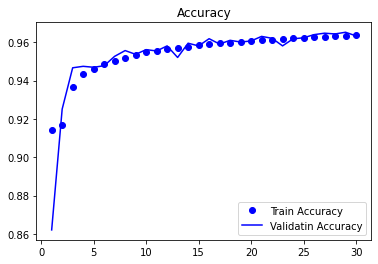

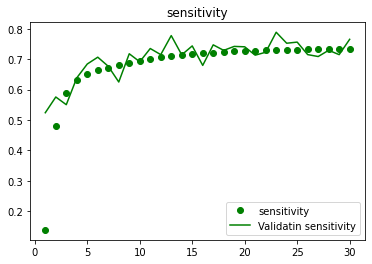

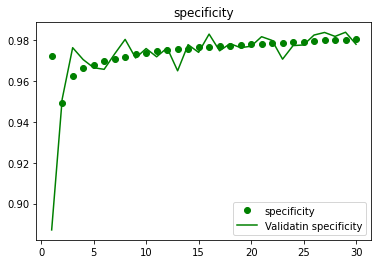

<Figure size 432x288 with 0 Axes>

In [6]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot history and pring evaluation of test dataset
metrics.print_evaluation(model, test_generator)
check_result.plot_history(HISTORY_PATH)

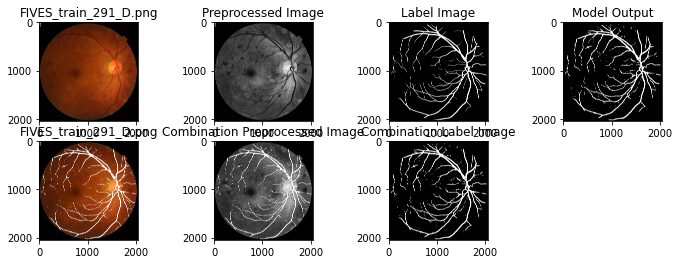

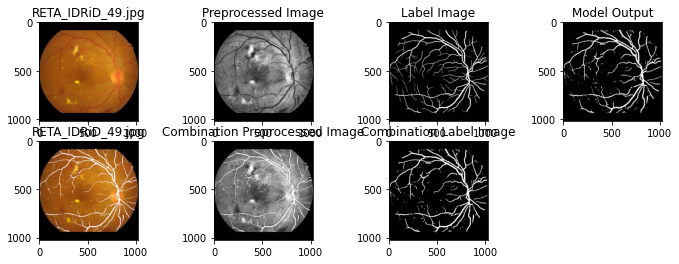

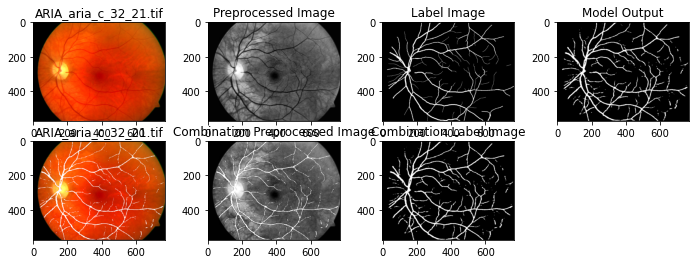

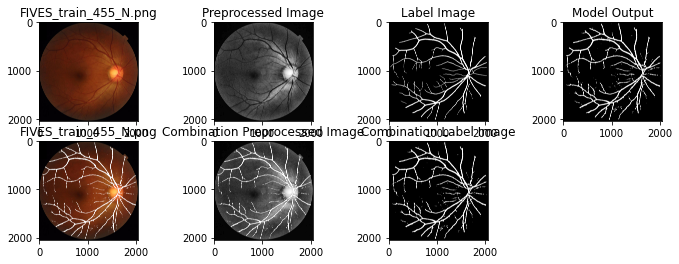

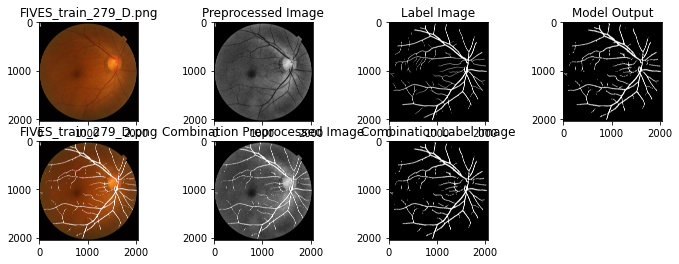

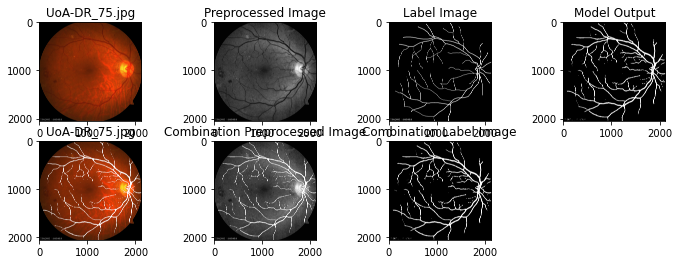

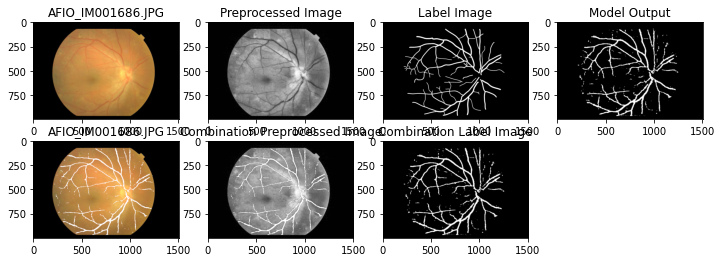

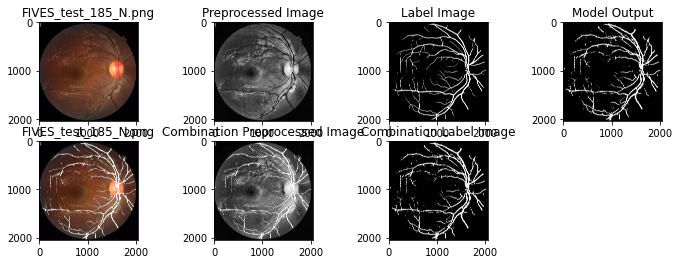

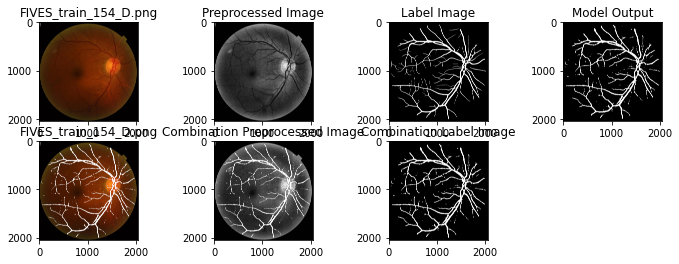

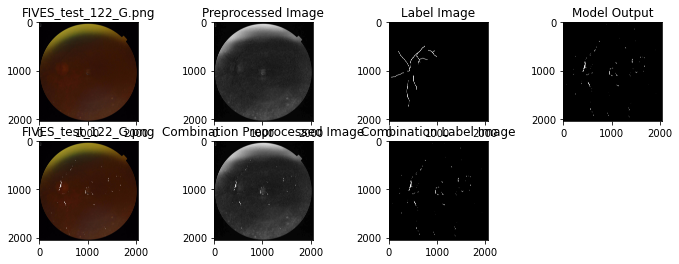

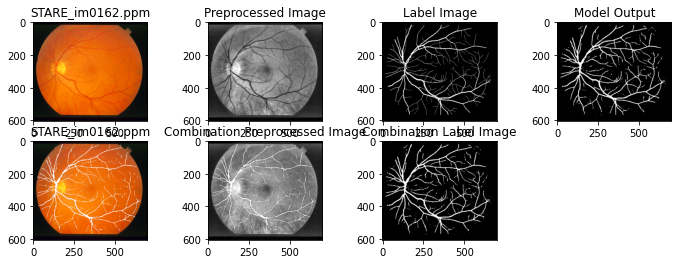

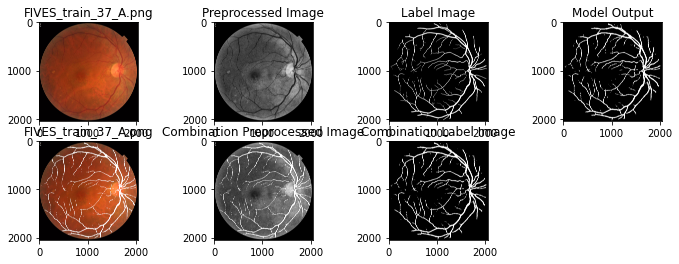

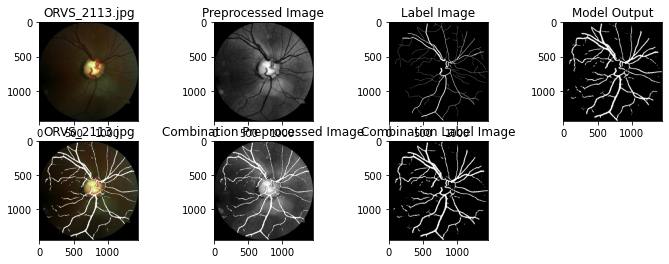

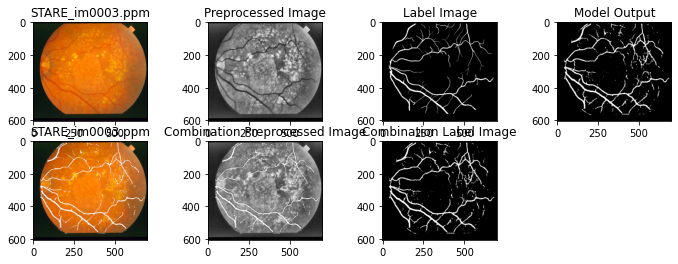

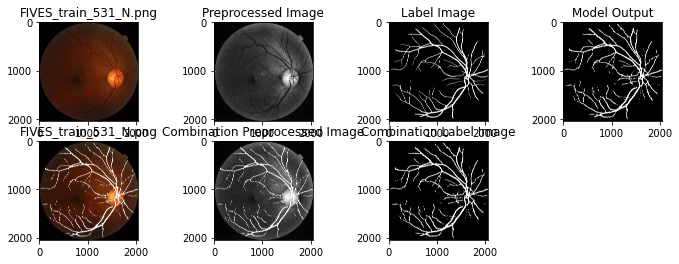

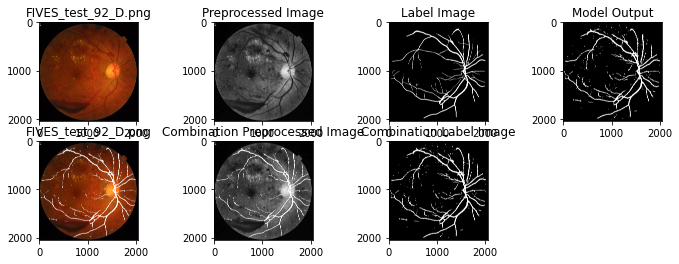

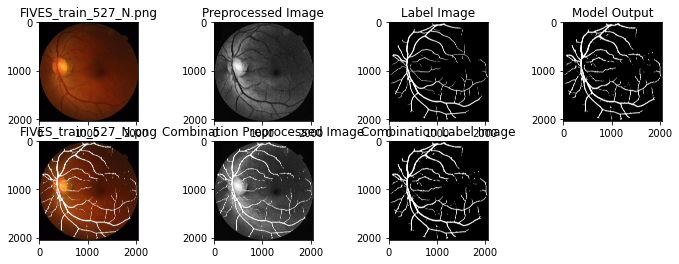

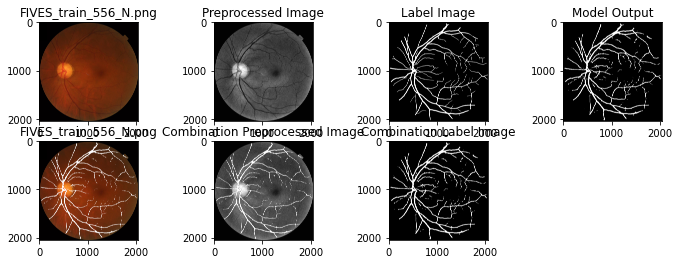

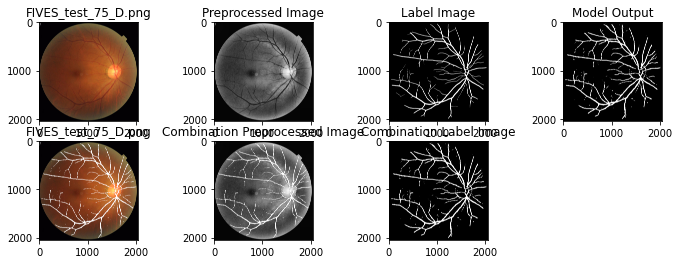

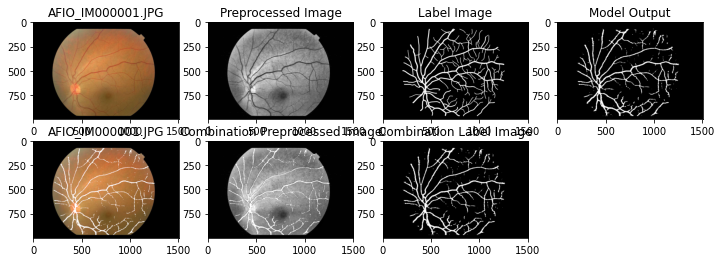

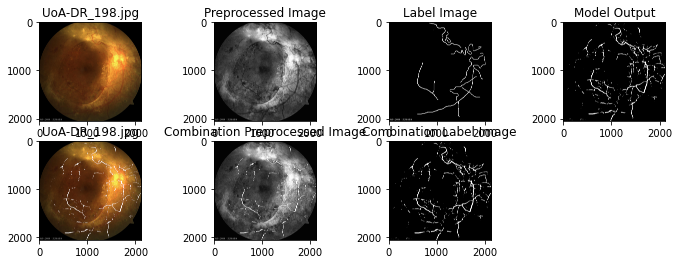

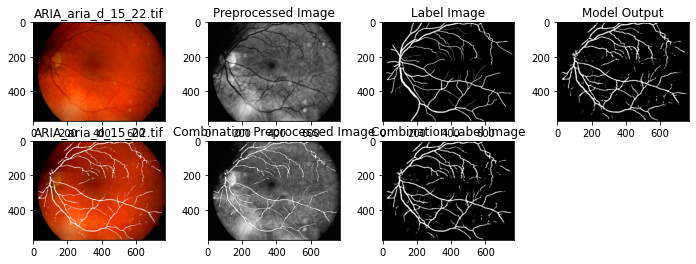

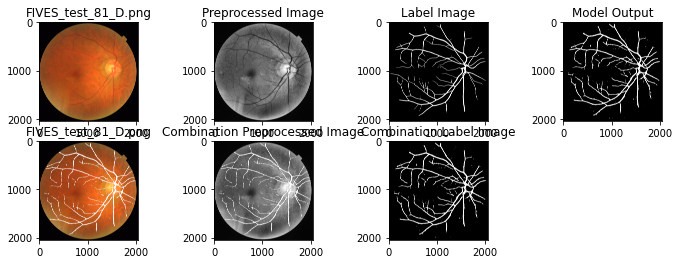

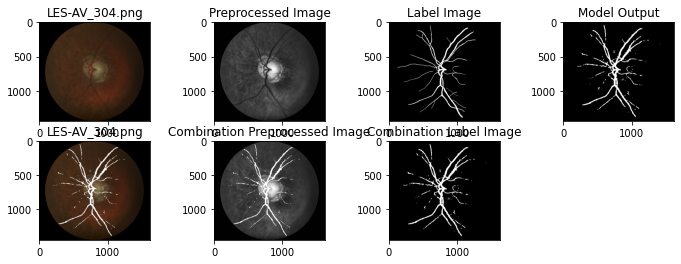

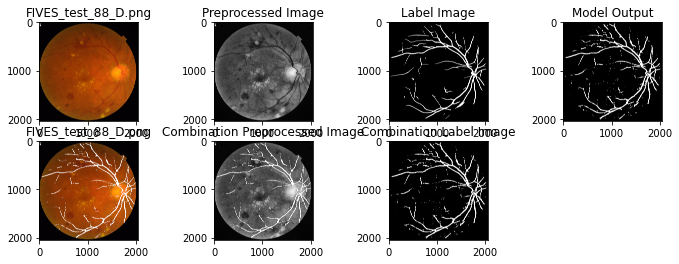

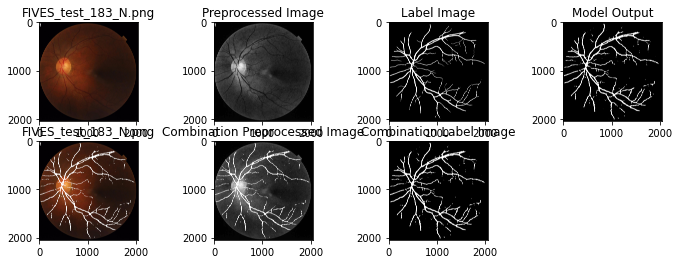

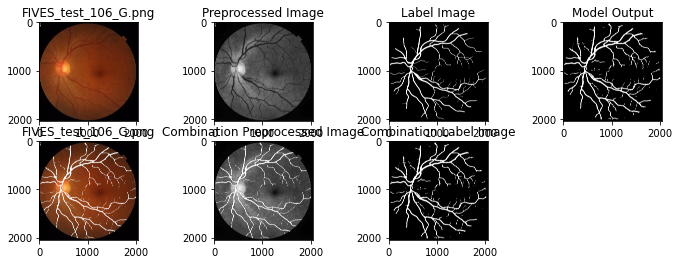

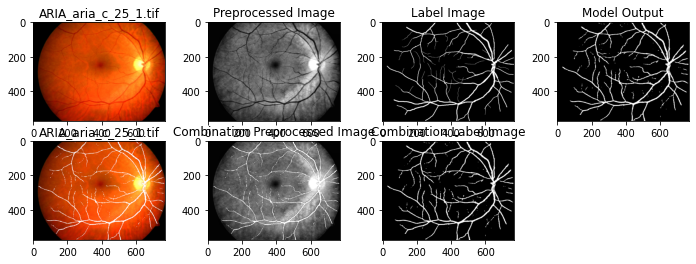

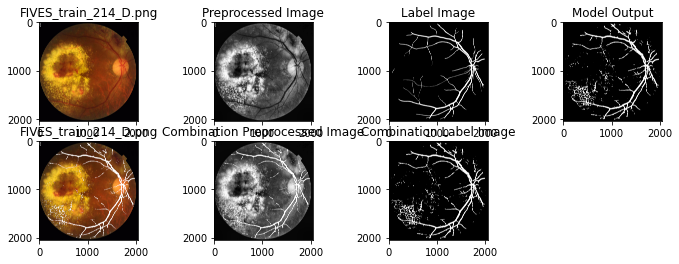

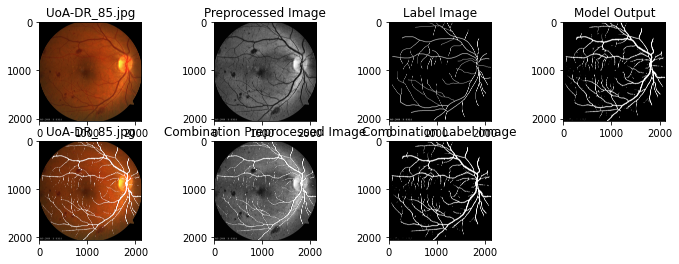

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [7]:
# Plot model result
num_images_to_select = 30
check_result.visualize_FG_result(model, num_images_to_select, SOURCE, INPUT_SHAPE, test_preproc)